In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import copy
import statistics
import csv

The purpose of this assignment is for you to build your own subroutine to randomize a network structure.

The goal should be to take an input network, (ideally) a predefined percentage of links r, and output a different network that comes from a random reassignment of the pairings of each links. Each node should preserve its degree, and if does not, then you should be able to provide a simple interpretable measure of how much that condition has been violated. 

To illustrate the effect of your randomization with the preservation of the degree, you should at least:

1) Present degree histograms of the original and randomized networks, where the expectation would be that the randomized network degree histograms would perfectly (or very closely) match the original degree histogram.

2) Present a secondary quantity that illustrates how randomizing the network has affect this secondary quantity. It is up to you to choose what to present, and presenting multiple versions of randomization will have an added value.

3) Ideally, you should explore in a systematic way the effect of the randomization percentage r on the secondary quantity. 

Please be prepared to present your results in about 10 minutes with questions included. We will do our best to stick to schedule.

Good luck and as always let me know if you need help.

In [3]:
G = nx.watts_strogatz_graph(100,8,0)#,seed=8080)
#x.draw_networkx(G)

In [4]:
def average_degree(G):
    degrees = [y for (x,y) in list(G.degree())]
    return(statistics.mean(degrees))

In [5]:
def count_triangles(G):
    triangles = list(nx.triangles(G).values())
    return(triangles)

In [6]:
def triangle_pr(inputG):
    triangles,degrees = [],[]
    for i in list(inputG.nodes()):
        triangles.append(nx.triangles(inputG,i))
        degrees.append(inputG.degree[i])
    return(triangles,degrees)

This method does not have to repeat rewirings; once an edge is updated it can be removed from consideration. <br>

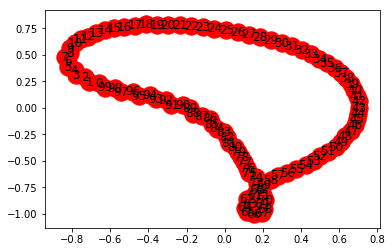

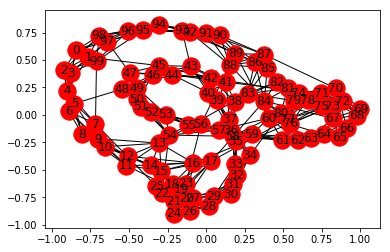

0.055

In [139]:
def rewire(Graph,r): # List version
    G = copy.deepcopy(Graph)
    edges = list(Graph.edges())
    
    # list for edges to be rewired
    rewire = []
    
    # populate list of edges to be rewired with probability r
    for i in edges:
        if random.random() < r:
            rewire.append(i)
            #edges.remove(i)
    
    # As long as edges remain to be rewired
    while len(rewire) > 0:
        #print(len(rewire),'rewires')

        # select Edge 1 to rewire
        a_ij = random.choice(rewire)
        
        # As long as it isn't too hard to find an edge to rewire to
        attempts = 10
        while attempts > 0:
            #print(attempts,'attempts')
            
            # select Edge 2 to rewire
            a_hk = random.choice(edges)
            
            # and get the nodes from the edges
            i = a_ij[0]
            j = a_ij[1]
            h = a_hk[0]
            k = a_hk[1]

            # Verify both selected edges exist in the Graph
            # and that they are not already crossed with
            # existing edges
            # (preserve degrees)
            if G.has_edge(i,j) == True \
            and G.has_edge(h,k) == True:
                if G.has_edge(i,h) == False \
                and G.has_edge(j,k) == False:
                    
                    # try statement because G.has_edge() has a defect somewhere; 
                    # over-reports a very small % of the time
                    try: 
                        # Then remove the original edges,
                        # add the rewired edges, and update
                        # the lists.
                        G.remove_edge(i,j)
                        G.remove_edge(h,k)
                        G.add_edge(i,h)
                        G.add_edge(j,k)
                        rewire.remove(a_ij) # decrements loop
                        edges.remove(a_hk)

                        # These to allow repeated rewirings
                        # Comment them out to prevent repeats
                        edges.append((i,h))
                        edges.append((j,k))

                        # Since this was succesful, clear attempts
                        attempts =0
                    except:
                        pass
            # Otherwise decrement
            attempts -=1
                    

            # If never successful, skip this rewire
            if attempts < 1:
                try:
                    del rewire[rewire.index(a_ij)]
                except:
                    pass
                    
    #print(rewire)
    return(G)

def rewire_percent(Graph1,Graph2):
    g1e = list(Graph1.edges())
    g2e = list(Graph2.edges())
    len1= len(g1e)
    len2= len(g2e)
    diff = [x for x in g1e if x not in g2e]
    rewired = len(diff)/(len2)
    #print("Rewired:",rewired)
    return(rewired)
    
                    
nx.draw_networkx(G)
plt.show()
G2 = rewire(G,.05)
nx.draw_networkx(G2)
plt.show()
rewire_percent(G,G2)

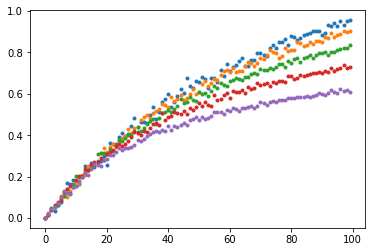

In [143]:
overall_percents = []

for v in range(1,6):
    G1 = nx.watts_strogatz_graph(100,v*10,0)
    #G2 = rewire(G1,0.1)
    #rewire_percent(G1,G2)

    percents = []
    for i in range(0,100):
        p = i/100
        G2= rewire(G1,p)
        percents.append(rewire_percent(G1,G2))
    overall_percents.append(percents)

for i in overall_percents:
    plt.plot(i,'.')

In [9]:
G1_av_deg = average_degree(G1)
G2_av_deg = average_degree(G2)
print(G1_av_deg,G2_av_deg)

10 10


In [10]:
def graph_from_data(data_file,skip_row):
    data = []
    G = nx.Graph()
    with open(data_file, newline='\n') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
             data.append(row)
    for itera in range(skip_row,len(data)):
        i = int(data[itera][0])
        j = int(data[itera][1])
        G.add_edge(i,j)
    return(G)

C = graph_from_data('ca-CondMat-noself.txt',4)

In [11]:
def hist_array(array):
    hist = {}
    for i in array:
        if i in hist:
            hist[i] += 1
        else:
            hist[i] = 1
    return([list(hist.keys()),list(hist.values())])

def plotter_log(x,y):
    plt.plot(x,y,'.')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    
def plotter_norm(x,y):
    plt.plot(x,y,'.')
    plt.show()
    
def plot_combo_log(x1,x2,y1,y2):
    plt.plot(x1,y1,'.',c='blue')
    plt.plot(x2,y2,'.',c='red')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

Triangle Distribution
Blue is original, red is after rewiring


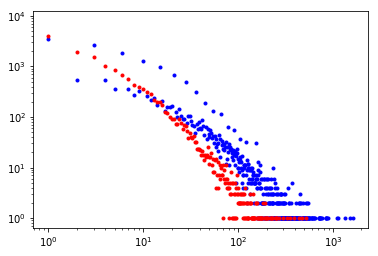

Degree Distribution
Blue is original, red is after rewiring


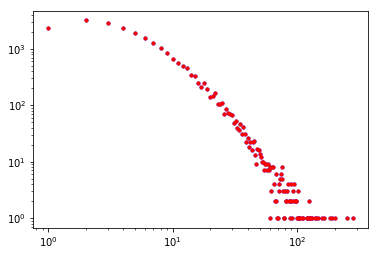

In [13]:
# Uncomment line below to rewire
C_r = rewire(C,.25)

C_t,  C_k  = triangle_pr(C)
Cr_t, Cr_k = triangle_pr(C_r)

C_t_hist  = hist_array(C_t)
C_k_hist  = hist_array(C_k)
Cr_t_hist = hist_array(Cr_t)
Cr_k_hist = hist_array(Cr_k)

print("Triangle Distribution\nBlue is original, red is after rewiring")
plot_combo_log(C_t_hist[0],Cr_t_hist[0],C_t_hist[1],Cr_t_hist[1])
#plotter_log(C_t_hist[0],C_t_hist[1])
#plotter_log(Cr_t_hist[0],Cr_t_hist[1])

print("Degree Distribution\nBlue is original, red is after rewiring")
plot_combo_log(C_k_hist[0],Cr_k_hist[0],C_k_hist[1],Cr_k_hist[1])
#plotter_log(C_k_hist[0],C_k_hist[1])
#plotter_log(Cr_k_hist[0],Cr_k_hist[1])

Triangle Distribution with Rewire Probability = 0.001


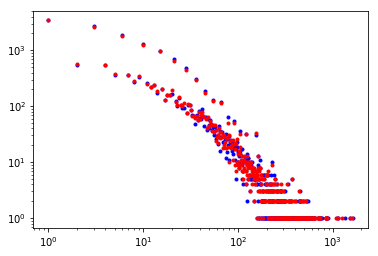

Triangle Distribution with Rewire Probability = 0.01


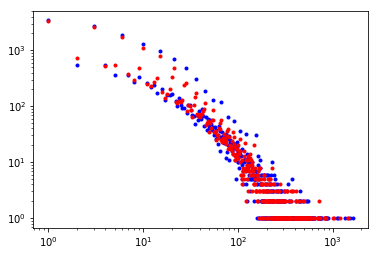

Triangle Distribution with Rewire Probability = 0.1


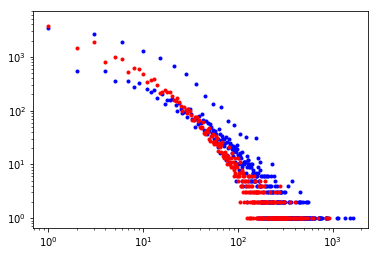

In [12]:
rewire_probas = [0.001, 0.01, 0.1]
for i in rewire_probas:
    C_r = rewire(C,i)
    Cr_t, Cr_k = triangle_pr(C_r)

    C_t_hist  = hist_array(C_t)
    C_k_hist  = hist_array(C_k)
    Cr_t_hist = hist_array(Cr_t)
    Cr_k_hist = hist_array(Cr_k)

    print("Triangle Distribution with Rewire Probability =",i)
    plot_combo_log(C_t_hist[0],Cr_t_hist[0],C_t_hist[1],Cr_t_hist[1])

In [449]:
# This takes a while to run
# Don't run live

mean_t = []
rw_p   = []
for i in range(0,100):
    if (i+1)%10==0:
        print('Loop',i+1)
    p = (i+1)/1000 # range from .001 to 0.1
    rw_p.append(p)
    C_r = rewire(C,p)
    Cr_t, Cr_k = triangle_pr(C_r)
    mean_t.append(statistics.mean(Cr_t))

Loop 10
Loop 20
Loop 30
Loop 40
Loop 50
Loop 60
Loop 70
Loop 80
Loop 90
Loop 100


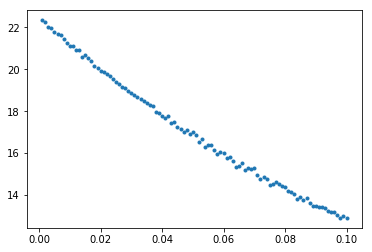

In [450]:
plt.plot(rw_p,mean_t,'.')